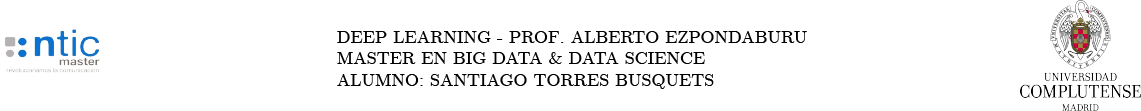

Dado que el entrenamiento de redes neuronales es una tarea  muy costosa, **se recomienda ejecutar el notebooks en [Google Colab](https://colab.research.google.com)**, por supuesto también se puede ejecutar en local.

Al entrar en [Google Colab](https://colab.research.google.com) bastará con hacer click en `upload` y subir este notebook. No olvide luego descargarlo en `File->Download .ipynb`

**El examen deberá ser entregado con las celdas ejecutadas, si alguna celda no está ejecutadas no se contará.**

El examen se divide en tres partes, con la puntuación que se indica a continuación. La puntuación máxima será 10.

- [Actividad 1: Redes Densas](#actividad_1): 4 pts
    - Correcta normalización: máximo de 0.25 pts
    - [Cuestión 1](#1.1): 1 pt
    - [Cuestión 2](#1.2): 1 pt
    - [Cuestión 3](#1.3): 0.5 pts
    - [Cuestión 4](#1.4): 0.25 pts
    - [Cuestión 5](#1.5): 0.25 pts
    - [Cuestión 6](#1.6): 0.25 pts
    - [Cuestión 7](#1.7): 0.25 pts
    - [Cuestión 8](#1.8): 0.25 pts


- [Actividad 2: Redes Convolucionales](#actividad_2): 4 pts
    - [Cuestión 1](#2.1): 1 pt
    - [Cuestión 2](#2.2): 1.5 pt
    - [Cuestión 3](#2.3): 0.5 pts
    - [Cuestión 4](#2.4): 0.25 pts
    - [Cuestión 5](#2.5): 0.25 pts
    - [Cuestión 6](#2.6): 0.25 pts
    - [Cuestión 7](#2.7): 0.25 pts


- [Actividad 3: Redes Recurrentes](#actividad_3): 2 pts
    - [Cuestión 1](#3.1): 0.5 pt
    - [Cuestión 2](#3.2): 0.5 pt
    - [Cuestión 3](#3.3): 0.5 pts
    - [Cuestión 4](#3.4): 0.25 pts
    - [Cuestión 5](#3.5): 0.25 pts



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
tf.random.set_seed(0)

In [2]:
!nvidia-smi

Sun Jul 16 15:44:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<a name='actividad_1'></a>
# Actividad 1: Redes Densas

Para esta primera actividad vamos a utilizar el [wine quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality). Con el que trataremos de predecir la calidad del vino.

**Puntuación**:

Normalizar las features correctamente (x_train, x_test): 0.25 pts , se pueden normalizar con el [Normalization layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Normalization) de Keras. Ejemplo de uso: [Introduction_to_RNN_Time_Series](https://github.com/ezponda/intro_deep_learning/blob/main/class/RNN/Introduction_to_RNN_Time_Series.ipynb)

```python
tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, dtype=None, mean=None, variance=None, **kwargs
)
```

- Correcta normalización: máximo de 0.25 pts
- [Cuestión 1](#1.1): 1 pt
- [Cuestión 2](#1.2): 1 pt
- [Cuestión 3](#1.3): 0.5 pts
- [Cuestión 4](#1.4): 0.25 pts
- [Cuestión 5](#1.5): 0.25 pts
- [Cuestión 6](#1.6): 0.25 pts
- [Cuestión 7](#1.7): 0.25 pts
- [Cuestión 8](#1.8): 0.25 pts



In [3]:
# Descargar los datos con pandas
df_red = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';'
)
df_white = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
    sep=';'
)
df = pd.concat([df_red, df_white])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]


# separar features y target
y = df.pop('quality').values
X = df.copy().values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('x_train, y_train shapes:', x_train.shape, y_train.shape)
print('x_test, y_test shapes:', x_test.shape, y_test.shape)
print('Some qualities: ', y_train[:5])

x_train, y_train shapes: (4872, 11) (4872,)
x_test, y_test shapes: (1625, 11) (1625,)
Some qualities:  [6 7 8 5 6]


In [6]:
# Si quiere, puede normalizar las features
normalizer = layers.Normalization()
normalizer.adapt(x_train)
x_train = normalizer(x_train)
x_test = normalizer(x_test)

<a name='1.1'></a>
## Cuestión 1: Cree un modelo secuencial que contenga 4 capas ocultas(hidden layers), con más de 60 neuronas  por capa, sin regularización y obtenga los resultados.

Puntuación:
- Obtener el modelo correcto: 0.8 pts
- Compilar el modelo: 0.1pts
- Acertar con la función de pérdida: 0.1 pts

In [7]:
model = tf.keras.models.Sequential()
# Código aquí
# First layer
model.add(layers.Dense(64, input_shape=(11,), activation='relu'))

# Second layer
model.add(layers.Dense(64, activation='relu'))

# Third layer
model.add(layers.Dense(64, activation='relu'))

# Fourth layer
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='linear'))

In [8]:
# Compilación del modelo
# Código aquí
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [9]:
# No modifique el código
model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=32,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
122/122 [==============================] - 10s 7ms/step - loss: 5.5617 - mae: 1.7169 - val_loss: 1.7501 - val_mae: 0.9569
Epoch 2/200
122/122 [==============================] - 1s 4ms/step - loss: 1.1992 - mae: 0.8557 - val_loss: 1.0743 - val_mae: 0.7765
Epoch 3/200
122/122 [==============================] - 1s 5ms/step - loss: 0.7789 - mae: 0.6842 - val_loss: 0.7243 - val_mae: 0.6374
Epoch 4/200
122/122 [==============================] - 1s 5ms/step - loss: 0.5945 - mae: 0.6005 - val_loss: 0.5631 - val_mae: 0.5697
Epoch 5/200
122/122 [==============================] - 1s 6ms/step - loss: 0.5230 - mae: 0.5597 - val_loss: 0.5577 - val_mae: 0.5738
Epoch 6/200
122/122 [==============================] - 1s 7ms/step - loss: 0.5051 - mae: 0.5484 - val_loss: 0.5164 - val_mae: 0.5376
Epoch 7/200
122/122 [==============================] - 1s 5ms/step - loss: 0.4860 - mae: 0.5425 - val_loss: 0.6088 - val_mae: 0.5955
Epoch 8/200
122/122 [==============================] - 1s 4ms/step -

In [10]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 [==============================] - 0s 2ms/step - loss: 0.6318 - mae: 0.5724
Test Loss: [0.6318410634994507, 0.5723918080329895]


<a name='1.2'></a>
## Cuestión 2: Utilice el mismo modelo de la cuestión anterior pero añadiendo al menos dos técnicas distinas de regularización.

Ejemplos de regularización: [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb)

Puntuación:

- Obtener el modelo con la regularización: 0.8 pts
- Obtener un `test loss` inferior al anterior: 0.2 pts


In [11]:
from tensorflow.keras.regularizers import L2

model = tf.keras.models.Sequential()
# Código aquí
# First layer
model.add(layers.Dense(64, input_shape=(11,), kernel_regularizer=L2(0.01) ,activation='relu'))
model.add(layers.Dropout(0.25))

# Second layer
model.add(layers.Dense(64, kernel_regularizer=L2(0.01) ,activation='relu'))
model.add(layers.Dropout(0.25))

# Third layer
model.add(layers.Dense(64, kernel_regularizer=L2(0.01), activation='relu'))
model.add(layers.Dropout(0.25))

# Fourth layer
model.add(layers.Dense(64, kernel_regularizer=L2(0.01), activation='relu'))
model.add(layers.Dropout(0.25))

# Output layer
model.add(layers.Dense(1, activation='linear'))

In [12]:
# Compilación del modelo
# Código aquí
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
    )

In [13]:
batch_size=64

In [14]:
# No modifique el código
model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=batch_size,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
61/61 [==============================] - 3s 8ms/step - loss: 17.2184 - mae: 3.3178 - val_loss: 5.5660 - val_mae: 1.5250
Epoch 2/200
61/61 [==============================] - 0s 6ms/step - loss: 5.6722 - mae: 1.5425 - val_loss: 3.7072 - val_mae: 1.0378
Epoch 3/200
61/61 [==============================] - 0s 5ms/step - loss: 4.6297 - mae: 1.3496 - val_loss: 3.6941 - val_mae: 1.1610
Epoch 4/200
61/61 [==============================] - 0s 5ms/step - loss: 3.9213 - mae: 1.1968 - val_loss: 3.0454 - val_mae: 0.9854
Epoch 5/200
61/61 [==============================] - 0s 6ms/step - loss: 3.3635 - mae: 1.0797 - val_loss: 2.6089 - val_mae: 0.8502
Epoch 6/200
61/61 [==============================] - 0s 7ms/step - loss: 3.0255 - mae: 0.9983 - val_loss: 2.1287 - val_mae: 0.6762
Epoch 7/200
61/61 [==============================] - 0s 8ms/step - loss: 2.7486 - mae: 0.9573 - val_loss: 2.2301 - val_mae: 0.7845
Epoch 8/200
61/61 [==============================] - 0s 8ms/step - loss: 2.4588 - 

In [15]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 [==============================] - 0s 2ms/step - loss: 0.5587 - mae: 0.5528
Test Loss: [0.5586872100830078, 0.5528335571289062]


<a name='1.3'></a>
## Cuestión 3: Utilice el mismo modelo de la cuestión anterior pero añadiendo un callback de early stopping.

In [16]:
model = tf.keras.models.Sequential()
# Código aquí
# First layer
model.add(layers.Dense(64, input_shape=(11,), kernel_regularizer=L2(0.01) ,activation='relu'))
model.add(layers.Dropout(0.25))

# Second layer
model.add(layers.Dense(64, kernel_regularizer=L2(0.01) ,activation='relu'))
model.add(layers.Dropout(0.25))

# Third layer
model.add(layers.Dense(64, kernel_regularizer=L2(0.01), activation='relu'))
model.add(layers.Dropout(0.25))

# Fourth layer
model.add(layers.Dense(64, kernel_regularizer=L2(0.01), activation='relu'))
model.add(layers.Dropout(0.25))

# Output layer
model.add(layers.Dense(1, activation='linear'))

In [17]:
# Compilación del modelo
# Código aquí
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [18]:
## definir el early stopping callback
# Código aquí
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1)

model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=32,
          validation_split=0.2,
          verbose=1,
          callbacks=[es_callback]) # Código aquí

Epoch 1/200
122/122 [==============================] - 3s 6ms/step - loss: 9.3918 - mae: 2.1471 - val_loss: 4.3952 - val_mae: 1.2532
Epoch 2/200
122/122 [==============================] - 1s 6ms/step - loss: 4.4530 - mae: 1.3003 - val_loss: 3.4007 - val_mae: 1.0717
Epoch 3/200
122/122 [==============================] - 1s 5ms/step - loss: 3.4394 - mae: 1.0650 - val_loss: 2.6249 - val_mae: 0.8326
Epoch 4/200
122/122 [==============================] - 1s 5ms/step - loss: 2.9046 - mae: 0.9582 - val_loss: 2.2666 - val_mae: 0.7411
Epoch 5/200
122/122 [==============================] - 1s 5ms/step - loss: 2.5630 - mae: 0.8755 - val_loss: 1.8922 - val_mae: 0.6190
Epoch 6/200
122/122 [==============================] - 1s 5ms/step - loss: 2.2764 - mae: 0.8213 - val_loss: 1.6825 - val_mae: 0.5748
Epoch 7/200
122/122 [==============================] - 1s 5ms/step - loss: 2.1124 - mae: 0.8084 - val_loss: 1.6688 - val_mae: 0.6167
Epoch 8/200
122/122 [==============================] - 1s 5ms/step - 

In [19]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 [==============================] - 0s 3ms/step - loss: 0.5967 - mae: 0.5735
Test Loss: [0.596704363822937, 0.5734557509422302]


<a name='1.4'></a>
## Cuestión 4: ¿Podría haberse usado otra función de activación de la neurona de salida? En caso afirmativo especifíquela.

La variable objetivo ***quality*** es de tipo numérica y en este caso toma valores mayores a cero, por lo que además de la función de activación lineal (`linear`) podría haberse utilizado la función **ReLU** ya que considera los valores no negativos $ReLU(z) = \max(0, z)$.

<a name='1.5'></a>
## Cuestión 5:  ¿Qué es lo que una neurona calcula?

**a)** Una función de activación seguida de una suma ponderada  de las entradas.

**b)** Una suma ponderada  de las entradas seguida de una función de activación.

**c)** Una función de pérdida, definida sobre el target.

**d)** Ninguna  de las anteriores es correcta


La opción correcta sería la **b)** Una suma ponderada de las entradas seguida de una función de activación.
<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/400px-Perceptr%C3%B3n_5_unidades.svg.png" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Figura 1:</b> Perceptron con cinco entradas. Fuente:
<a href="https://es.wikipedia.org/wiki/Perceptr%C3%B3n">Wikipedia.com/Perceptrón</a>.</figcaption>
</figure>

<a name='1.6'></a>
## Cuestión 6:  ¿Cuál de estas funciones de activación no debería usarse en una capa oculta (hidden layer)?

**a)** `sigmoid`

**b)** `tanh`

**c)** `relu`

**d)** `linear`


La función de activación `linear` no debería usarse en capas ocultas ya que lo que se busca con ellas es buscar aquellos patrones no lineales en una red neuronal, y esta función de activación no permite descubrir aquellas conexiones más complejas entre los datos que no ocurren de forma lineal.

<a name='1.7'></a>
## Cuestión 7:  ¿Cuál de estas técnicas es efectiva para combatir el overfitting en una red con varias capas ocultas? Ponga todas las que lo sean.

**a)** Dropout

**b)** Regularización L2.

**c)** Aumentar el tamaño del test set.

**d)** Aumentar el tamaño del validation set.

**e)** Reducir el número de capas de la red.

**f)** Data augmentation.

Para prevenir casos de _overfitting_ se pueden emplear las técnicas de:

a) **Dropout:** consiste en desactivar de forma aleatoria un subconjunto de neuronas en cada iteración, acorde a una probabilidad de descarte definida. Con el _dropout_ se evita que las neuronas se vuelvan dependientes de la presencia de otras neuronas específicas, y promueve una mayor robustez y generalización del modelo.

b) **Regularización L2**: También conocida como _ridge_, esta regularización añade un término de penalización haciendo que los pesos de la red sean más pequeños logrando distribuir los pesos de manera más uniforme.

e) **Reducir el número de capas de la red:** Para prevenir el sobreajuste, es recomendable utilizar modelos simples con menos parámetros en lugar de modelos complejos con más parámetros. Los modelos de aprendizaje profundo pueden ajustarse bien a los datos de entrenamiento, pero la verdadera meta es lograr una buena generalización.

f) **Data augmentation:** utilizada mayormente en el campo de la visión artificial, consiste en aplicar transformaciones aleatorias a los datos de entrenamiento ligeramente diferentes a la original, pero iguales en esencia. Estas transformaciones pueden incluir rotaciones, traslaciones, zoom, cambios de brillo o saturación, entre otros.

**Fuente:** [medium.com/técnicas-de-regularización-para-redes-neuronales](https://medium.com/metadatos/t%C3%A9cnicas-de-regularizaci%C3%B3n-b%C3%A1sicas-para-redes-neuronales-b48f396924d4)

<a name='1.8'></a>
## Cuestión 8:  Supongamos que queremos entrenar una red para un problema de clasificación de imágenes con las siguientes clases: {'perro','gato','persona'}. ¿Cuántas neuronas y que función de activación debería tener la capa de salida? ¿Qué función de pérdida (loss function) debería usarse?


En un problema de clasificación de imágenes de tipo multiclase, debería emplearse 1 neurona por cada clase y en este caso deberían utilizarse:
- 3 neuronas (para perro, gato y persona)
- con función de activación `softmax`
- y con función de perdida `loss = categorical_crossentropy` o `loss = sparse_categorical_crossentropy` dependiendo si los valores de la target se encuentran en formato one-hot-encoded o en formato ordinal.

<a name='actividad_2'></a>
# Actividad 2: Redes Convolucionales

Vamos a usar el dataset [cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html), que son 60000 imágenes de 32x32 a color  con 10 clases diferentes. Para realizar mejor la práctica puede consultar [Introduction_to_CNN.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CNN.ipynb).



**Puntuación**:

- [Cuestión 1](#2.1): 1 pt
- [Cuestión 2](#2.2): 1.5 pt
- [Cuestión 3](#2.3): 0.5 pts
- [Cuestión 4](#2.4): 0.25 pts
- [Cuestión 5](#2.5): 0.25 pts
- [Cuestión 6](#2.6): 0.25 pts
- [Cuestión 7](#2.7): 0.25 pts




Puede normalizar las imágenes al principio o usar la capa [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling):

```python
tf.keras.layers.experimental.preprocessing.Rescaling(
    scale, offset=0.0, name=None, **kwargs
)
```

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 [==============================] - 6s 0us/step


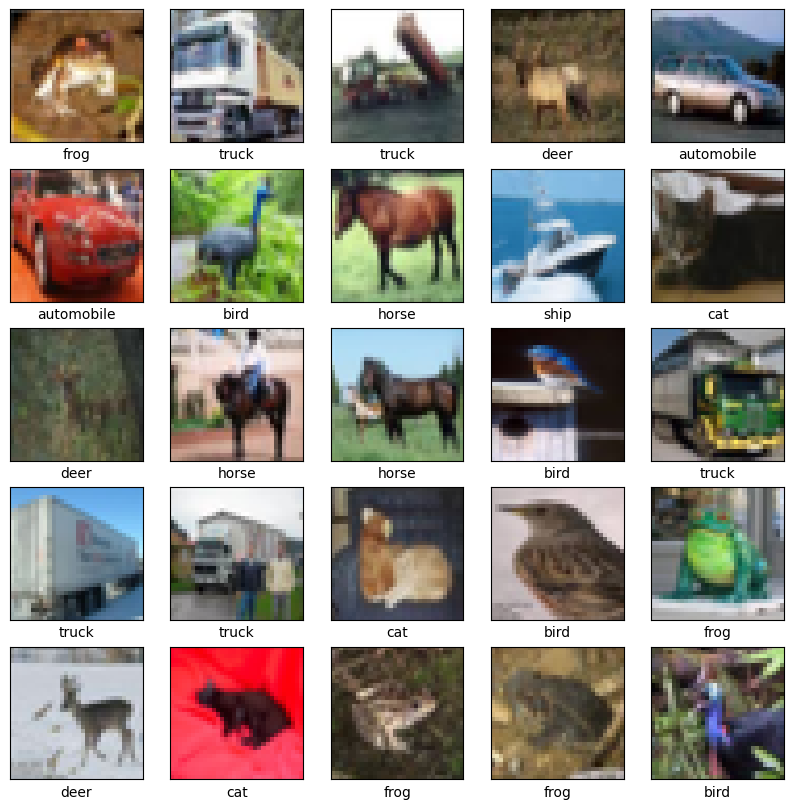

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [22]:
print('x_train, y_train shapes:', x_train.shape, y_train.shape)
print('x_test, y_test shapes:', x_test.shape, y_test.shape)

x_train, y_train shapes: (50000, 32, 32, 3) (50000,)
x_test, y_test shapes: (10000, 32, 32, 3) (10000,)


<a name='2.1'></a>
## Cuestión 1: Cree una red convolucional con la API funcional con al menos dos capas convolucionales y al menos dos capas de pooling. Utilize sólo [Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) y no añada ninguna regularización.

In [23]:
inputs = tf.keras.Input(shape=(32, 32, 3), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Convolution + pooling layers
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation='relu', name='conv_1', padding='same')(reescaling)
pool_1 = layers.AveragePooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

conv_2 = layers.Conv2D(filters=32, kernel_size=3, activation='relu', name='conv_2', padding='same')(pool_1)
pool_2 = layers.AveragePooling2D(pool_size=(2, 2), name='pool_2')(conv_2)

conv_3 = layers.Conv2D(filters=32, kernel_size=3, activation='relu', name='conv_3', padding='same')(pool_2)
pool_3 = layers.AveragePooling2D(pool_size=(2, 2), name='pool_3')(conv_3)

# Flattening
flat = layers.Flatten(name='flatten')(pool_3)

# Fully-connected
dense = layers.Dense(32, activation='relu', name='dense')(flat)
outputs = layers.Dense(10, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32,
                    validation_split=0.15)

Epoch 1/25
1329/1329 [==============================] - 14s 5ms/step - loss: 1.6677 - accuracy: 0.3936 - val_loss: 1.4444 - val_accuracy: 0.4688
Epoch 2/25
1329/1329 [==============================] - 7s 5ms/step - loss: 1.3528 - accuracy: 0.5114 - val_loss: 1.2806 - val_accuracy: 0.5375
Epoch 3/25
1329/1329 [==============================] - 7s 5ms/step - loss: 1.2079 - accuracy: 0.5705 - val_loss: 1.1649 - val_accuracy: 0.5847
Epoch 4/25
1329/1329 [==============================] - 7s 5ms/step - loss: 1.1028 - accuracy: 0.6097 - val_loss: 1.1011 - val_accuracy: 0.6121
Epoch 5/25
1329/1329 [==============================] - 7s 5ms/step - loss: 1.0265 - accuracy: 0.6357 - val_loss: 1.0377 - val_accuracy: 0.6373
Epoch 6/25
1329/1329 [==============================] - 7s 5ms/step - loss: 0.9787 - accuracy: 0.6531 - val_loss: 1.0438 - val_accuracy: 0.6327
Epoch 7/25
1329/1329 [==============================] - 6s 5ms/step - loss: 0.9315 - accuracy: 0.6710 - val_loss: 0.9350 - val_accuracy

In [26]:
results = model.evaluate(x_test, y_test, verbose=0, batch_size=1000)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.8540553450584412
Test Accuracy: 0.7129999995231628


<a name='2.2'></a>
## Cuestión 2: Cree un modelo con la API funcional con un máximo de 2 capas convolucionales y un máximo de 2 capas de pooling. Utilize  [Max Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) o [Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) y  añada la regularización que quiera. Debe obtener un `Test accuracy > 0.68`

In [27]:
inputs = tf.keras.Input(shape=(32, 32, 3), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Convolution + pooling layers
conv_1 = layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding='same', name='conv_1')(reescaling)
conv_1 = layers.BatchNormalization()(conv_1)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)
pool_1 = layers.Dropout(0.25)(pool_1)

conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding='same', name='conv_2')(pool_1)
conv_2 = layers.BatchNormalization()(conv_2)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)
pool_2 = layers.Dropout(0.25)(pool_2)

# Flattening
flat = layers.Flatten(name='flatten')(pool_2)

# Fully-connected
dense = layers.Dense(128, activation='relu', name='dense')(flat)
dense = layers.Dropout(0.25)(dense)
outputs = layers.Dense(10, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [29]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1)

In [30]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.15, callbacks=[es_callback])

Epoch 1/100
1329/1329 [==============================] - 11s 6ms/step - loss: 1.6238 - accuracy: 0.4201 - val_loss: 1.3191 - val_accuracy: 0.5211
Epoch 2/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.2725 - accuracy: 0.5454 - val_loss: 1.2093 - val_accuracy: 0.5879
Epoch 3/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.1441 - accuracy: 0.6013 - val_loss: 1.4666 - val_accuracy: 0.5149
Epoch 4/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.0536 - accuracy: 0.6328 - val_loss: 1.0328 - val_accuracy: 0.6400
Epoch 5/100
1329/1329 [==============================] - 8s 6ms/step - loss: 0.9819 - accuracy: 0.6566 - val_loss: 0.9960 - val_accuracy: 0.6487
Epoch 6/100
1329/1329 [==============================] - 8s 6ms/step - loss: 0.9239 - accuracy: 0.6779 - val_loss: 0.9222 - val_accuracy: 0.6792
Epoch 7/100
1329/1329 [==============================] - 8s 6ms/step - loss: 0.8693 - accuracy: 0.6946 - val_loss: 1.1348 - val_a

In [31]:
results = model.evaluate(x_test, y_test, verbose=0, batch_size=1000)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.8565261960029602
Test Accuracy: 0.7333999872207642


<a name='2.3'></a>
## Cuestión 3: Añada data augmentation al principio del modelo. No es necesario mejorar el test_loss.



In [32]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25)
  ]
)

In [33]:
inputs = tf.keras.Input(shape=(32, 32, 3), name='input')
data_aug= data_augmentation(inputs)
reescaling = layers.Rescaling(1. / 255)(inputs)

# Convolution + pooling layers
conv_1 = layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding='same', name='conv_1')(reescaling)
conv_1 = layers.BatchNormalization()(conv_1)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)
pool_1 = layers.Dropout(0.25)(pool_1)

conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding='same', name='conv_2')(pool_1)
conv_2 = layers.BatchNormalization()(conv_2)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)
pool_2 = layers.Dropout(0.25)(pool_2)

# Flattening
flat = layers.Flatten(name='flatten')(pool_2)

# Fully-connected
dense = layers.Dense(128, activation='relu', name='dense')(flat)
dense = layers.Dropout(0.25)(dense)
outputs = layers.Dense(10, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs)

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.15, callbacks=[es_callback])

Epoch 1/100
1329/1329 [==============================] - 11s 6ms/step - loss: 1.6444 - accuracy: 0.4092 - val_loss: 1.2847 - val_accuracy: 0.5380
Epoch 2/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.2927 - accuracy: 0.5380 - val_loss: 1.1771 - val_accuracy: 0.6005
Epoch 3/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.1455 - accuracy: 0.5981 - val_loss: 1.1603 - val_accuracy: 0.5972
Epoch 4/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.0515 - accuracy: 0.6297 - val_loss: 1.4264 - val_accuracy: 0.5616
Epoch 5/100
1329/1329 [==============================] - 8s 6ms/step - loss: 0.9671 - accuracy: 0.6600 - val_loss: 0.9444 - val_accuracy: 0.6736
Epoch 6/100
1329/1329 [==============================] - 7s 6ms/step - loss: 0.9086 - accuracy: 0.6792 - val_loss: 0.9851 - val_accuracy: 0.6664
Epoch 7/100
1329/1329 [==============================] - 8s 6ms/step - loss: 0.8604 - accuracy: 0.6982 - val_loss: 0.9353 - val_a

In [36]:
results = model.evaluate(x_test, y_test, verbose=0, batch_size=1000)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.8611828088760376
Test Accuracy: 0.7239999771118164


<a name='2.4'></a>
## Cuestión 4: Cree el mismo  modelo de manera secuencial. No es necesario compilar ni entrenar el modelo

In [37]:
model_seq = tf.keras.models.Sequential()
# Código aquí
# Data Augmentation
model_seq.add(layers.RandomFlip("horizontal_and_vertical"))
model_seq.add(layers.RandomRotation(0.25))

# Rescaling
model_seq.add(layers.Rescaling(1.0 / 255, input_shape=(32, 32, 3)))

# Convolution + pooling layers en forma secuencial
model_seq.add(layers.Conv2D(filters=64,kernel_size=3, activation='relu', name='conv_1', padding='same'))
model_seq.add(layers.BatchNormalization())
model_seq.add(layers.MaxPooling2D(pool_size=(2, 2), name='pool_1'))
model_seq.add(layers.Dropout(0.25))

model_seq.add(layers.Conv2D(filters=64,kernel_size=3, activation='relu', name='conv_2', padding='same'))
model_seq.add(layers.BatchNormalization())
model_seq.add(layers.MaxPooling2D(pool_size=(2, 2), name='pool_2'))
model_seq.add(layers.Dropout(0.25))

# Flattening
model_seq.add(layers.Flatten(name='flatten'))

# Dense
model_seq.add(layers.Dense(128, activation='relu', name='dense'))
model_seq.add(layers.Dropout(0.25))

# Output
model_seq.add(layers.Dense(10, activation='softmax', name='output'))


<a name='2.5'></a>
## Cuestión 5: Si tenemos una  una imagen de entrada de 300 x 300 a color (RGB) y queremos usar una red densa. Si la primera capa oculta tiene 100 neuronas, ¿Cuántos parámetros tendrá esa capa (sin incluir el bias) ?


Para una imagen de 300 x 300 a con colores RGB, estamos teniendo un imput de 300 x 300 x 3 = 270.000 x 100 neuronas de la primera capa oculta, tendríamos un total de 27.000.000 de parámetros sin considerar el bias.

<a name='2.6'></a>
## Cuestión 6   Ponga  las verdaderas ventajas de las redes convolucionales respecto a las densas

**a)** Reducen el número total de parámetros, reduciendo así el overfitting.

**b)** Permiten utilizar una misma 'función'  en varias localizaciones de la imagen de entrada, en lugar de aprender una función diferente para cada pixel.

**c)** Permiten el uso del transfer learning.

**d)** Generalmente son menos profundas, lo que facilita su entrenamiento.



Las ventajas de las CNN respecto a las redes densas son:

a) **Reducen el número total de parámetros, reduciendo así el overfitting:** Las CNN utilizan operaciones de convolución y pooling, lo que les permite compartir pesos y reducir el número total de parámetros en comparación con las redes densas (fully connected). Esto es especialmente útil en problemas de visión artificial o _computer vision_, donde las imágenes pueden tener un alto número de píxeles. Al reducir la cantidad de parámetros, las CNN son menos propensas al sobreajuste (overfitting) y pueden generalizar mejor a nuevos datos.

b) **Permiten utilizar una misma 'función' en varias localizaciones de la imagen de entrada, en lugar de aprender una función diferente para cada pixel.:** En una CNN, las capas convolucionales aplican filtros o kernels de la imagen de entrada. Estos filtros se van desplazando por la imagen, lo que permite detectar características similares en diferentes partes de ella.

c) **Permiten el uso de transfer learning:** las CNN también son aprovechadas mediante su uso con transfer learning, al permitir reutilizar modelos pre-entrenados con grandes volúmenes de datos para diversas tareas como clasificación de imágenes, detección de objetos, entre otros.

<a name='2.7'></a>
## Cuestión 7: Para el procesamiento de series temporales las redes convolucionales no son efectivas, habrá que usar redes recurrentes.

- **Verdadero**
- **Falso**

**Falso**. Si bien las RNN se utilizan de forma generalizada para la predicción de series temporales debido a su capacidad de retener en memoria la información de manera secuencial. [Gábor Petneházi (2019). Recurrent Neural Networks for Time Series Forecasting.](https://arxiv.org/pdf/1901.00069.pdf) existen tipos de redes convolucionales (Temporal Convolutional Networks o *TCN*) que también pueden procesar datos de manera secuencial sin ser menos efectivas. Ver [Bai, S., Kolter, J. Z., & Koltun, V. (2018). An empirical evaluation of generic convolutional and recurrent networks for sequence modeling.](https://arxiv.org/pdf/1803.01271.pdf)

<a name='actividad_3'></a>
# Actividad 3: Redes Recurrentes


- [Cuestión 1](#3.1): 0.5 pt
- [Cuestión 2](#3.2): 0.5 pt
- [Cuestión 3](#3.3): 0.5 pts
- [Cuestión 4](#3.4): 0.25 pts
- [Cuestión 5](#3.5): 0.25 pts

Vamos a usar un dataset de las temperaturas mínimas diarias en Melbourne. La tarea será la de predecir la temperatura mínima en dos días. Puedes usar técnicas de series temporales vistas en otras asignaturas, pero no es necesario.


In [38]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data_dir = tf.keras.utils.get_file('daily-min-temperatures.csv', origin=dataset_url)

67921/67921 [==============================] - 0s 0us/step


In [39]:
df = pd.read_csv(data_dir, parse_dates=['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [40]:
temperatures = df['Temp'].values
print('number of samples:', len(temperatures))
train_data = temperatures[:3000]
test_data = temperatures[3000:]
print('number of train samples:', len(train_data))
print('number of test samples:', len(test_data))
print('firsts trainn samples:', train_data[:10])

number of samples: 3650
number of train samples: 3000
number of test samples: 650
firsts trainn samples: [20.7 17.9 18.8 14.6 15.8 15.8 15.8 17.4 21.8 20. ]


<a name='3.1'></a>
## Cuestión 1: Convierta `train_data` y `test_data`  en ventanas de tamaño 5, para predecir el valor en 2 días

En la nomenclatura de [Introduction_to_RNN_Time_Series.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/RNN/Introduction_to_RNN_Time_Series.ipynb)
```python
win_size, horizon = (5, 2)
```

Para las primeras 10 muestras de train_data `[20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20. ]` el resultado debería ser:

```python
x[0] : [20.7, 17.9, 18.8, 14.6, 15.8] , y[0]: 15.8
x[1] : [17.9, 18.8, 14.6, 15.8, 15.8] , y[1]: 17.4
x[2] : [18.8, 14.6, 15.8, 15.8, 15.8] , y[2]: 21.8
x[3] : [14.6, 15.8, 15.8, 15.8, 17.4] , y[3]: 20.
```

In [41]:
# windowing function
def create_windows_np(data, window_size, horizon, shuffle=False):
    """
    Creates a dataset from the given time series data using NumPy.

    Parameters:
    data (np.ndarray): Time series data with one dimension.
    window_size (int): The number of past time steps to use as input features.
    horizon (int): The number of future time steps to predict.
    shuffle (bool): Shuffle the windows or not.

    Returns:
    tuple: A tuple containing the input-output pairs (windows, targets) as NumPy arrays.
    """

    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size+horizon-1])

    X, y = np.array(X), np.array(y)

    if shuffle:
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]

    return X, y

In [42]:
win_size, horizon = (5, 2)

# Puede usar np
X_train, y_train = create_windows_np(train_data, win_size, horizon, shuffle=False)
X_test, y_test = create_windows_np(test_data, win_size, horizon, shuffle=False)

# Imprimir por pantalla los primeros 4 resultados para comprobar con la consigna
for ind in range(min(4, len(y_train))):
    print(X_train[ind, :], y_train[ind])

[20.7 17.9 18.8 14.6 15.8] 15.8
[17.9 18.8 14.6 15.8 15.8] 17.4
[18.8 14.6 15.8 15.8 15.8] 21.8
[14.6 15.8 15.8 15.8 17.4] 20.0


<a name='3.2'></a>
## Cuestión 2: Cree un modelo recurrente de dos capas GRU para predecir con las ventanas de la cuestión anterior.


In [43]:
# Defino el input shape con el tamaño de la ventana y el número a predecir
inputs = keras.layers.Input(shape=(win_size, 1))

# Defino la primera capa GRU
gru_1 = keras.layers.GRU(64, return_sequences=True)(inputs)

# Segunda capa GRU
gru_2 = keras.layers.GRU(64, return_sequences=False)(gru_1)

# Capa de salida
outputs = keras.layers.Dense(1)(gru_2)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 gru (GRU)                   (None, 5, 64)             12864     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [44]:
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=5)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_split=0.2,
    shuffle=True,
    batch_size = 64,
    callbacks=[es_callback]
)

Epoch 1/200
38/38 [==============================] - 6s 26ms/step - loss: 44.1600 - val_loss: 17.4855
Epoch 2/200
38/38 [==============================] - 0s 6ms/step - loss: 16.2119 - val_loss: 16.0981
Epoch 3/200
38/38 [==============================] - 0s 7ms/step - loss: 14.4030 - val_loss: 14.3700
Epoch 4/200
38/38 [==============================] - 0s 6ms/step - loss: 11.9382 - val_loss: 11.4902
Epoch 5/200
38/38 [==============================] - 0s 7ms/step - loss: 10.5586 - val_loss: 10.0290
Epoch 6/200
38/38 [==============================] - 0s 6ms/step - loss: 9.6661 - val_loss: 9.7724
Epoch 7/200
38/38 [==============================] - 0s 7ms/step - loss: 9.1315 - val_loss: 8.6956
Epoch 8/200
38/38 [==============================] - 0s 6ms/step - loss: 9.0640 - val_loss: 8.5427
Epoch 9/200
38/38 [==============================] - 0s 7ms/step - loss: 8.8781 - val_loss: 9.2635
Epoch 10/200
38/38 [==============================] - 0s 7ms/step - loss: 8.8531 - val_loss: 8.399

In [45]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

21/21 [==============================] - 0s 3ms/step - loss: 7.0308
Test Loss: 7.030808925628662


<a name='3.3'></a>
## Cuestión 3: Añada más features a la series temporal, por ejemplo `portion_year`. Cree un modelo que mejore al anterior.


In [46]:
## Puede añadir más features
# Ejemplo
df['portion_year'] = df['Date'].dt.dayofyear / 365.0

# Moving Averages
df['prev_week_mu'] = df['Temp'].rolling(window=7).mean()
df['prev_week_sigma'] = df['Temp'].rolling(window=7).std()
df['prev_day'] = df['Temp'].shift(1)
df['prev_week'] = df['Temp'].shift(7)
df = df.dropna()

# Trimestres
df['quarter'] = df['Date'].dt.quarter

df_multi = df[['Temp', 'portion_year', 'prev_week_mu', 'prev_week_sigma', 'prev_day','prev_week', 'quarter']].copy()

## train - test split
train_data = df_multi.iloc[:3000].copy()
test_data = df_multi.loc[3000:, :].copy()

<ipython-input-46-c08279523d66>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df['Date'].dt.quarter


In [47]:
df_multi.head()

,Temp,portion_year,prev_week_mu,prev_week_sigma,prev_day,prev_week,quarter
7,17.4,0.021918,16.585714,1.476966,15.8,20.7,1
8,21.8,0.024658,17.142857,2.462287,17.4,17.9,1
9,20.0,0.027397,17.314286,2.632761,21.8,18.8,1
10,16.2,0.030137,17.542857,2.418579,20.0,14.6,1
11,13.3,0.032877,17.185714,2.862649,16.2,15.8,1


In [48]:
## Create windows
def create_windows_multivariate_np(data, window_size, horizon, target_col_idx, shuffle=False):
    """
    Creates a dataset from the given time series data using NumPy.

    Parameters:
    data (np.ndarray or pd.DataFrame): Time series data with multiple features.
    window_size (int): The number of past time steps to use as input features.
    horizon (int): The number of future time steps to predict.
    target_col_idx (int): The index of the target column in the input data.
    shuffle (bool): Whether to shuffle the data or not.

    Returns:
    tuple: A tuple containing the input-output pairs (X, y) as NumPy arrays.
    """
    if isinstance(data, pd.DataFrame):
        data = data.values

    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i+window_size, :])
        y.append(data[i+window_size+horizon-1, target_col_idx])

    X, y = np.array(X), np.array(y)

    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]

    return X, y

# Puede usar numpy
X_train, y_train = create_windows_multivariate_np(
    train_data, win_size, horizon, target_col_idx=0)
X_test, y_test = create_windows_multivariate_np(
    test_data, win_size, horizon, target_col_idx=0)

In [49]:
# Input layer
inputs = keras.layers.Input(shape=(win_size, 7))

# Primera capa GRU
gru_1 = keras.layers.GRU(64, return_sequences=True)(inputs)

# Segunda capa GRU
gru_2 = keras.layers.GRU(64, return_sequences=False)(gru_1)

# Output layer
outputs = keras.layers.Dense(1)(gru_2)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 7)]            0         
                                                                 
 gru_2 (GRU)                 (None, 5, 64)             14016     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39,041
Trainable params: 39,041
Non-trainable params: 0
_________________________________________________________________


In [50]:
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=5)


history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_split=0.2, shuffle=True, batch_size = 64, callbacks=[es_callback]
)

Epoch 1/200
38/38 [==============================] - 5s 23ms/step - loss: 45.5716 - val_loss: 21.6352
Epoch 2/200
38/38 [==============================] - 0s 7ms/step - loss: 17.1250 - val_loss: 17.2915
Epoch 3/200
38/38 [==============================] - 0s 9ms/step - loss: 16.3371 - val_loss: 16.4790
Epoch 4/200
38/38 [==============================] - 0s 8ms/step - loss: 12.3139 - val_loss: 11.8882
Epoch 5/200
38/38 [==============================] - 0s 7ms/step - loss: 9.8015 - val_loss: 9.5767
Epoch 6/200
38/38 [==============================] - 0s 8ms/step - loss: 8.8786 - val_loss: 8.7019
Epoch 7/200
38/38 [==============================] - 0s 6ms/step - loss: 8.7199 - val_loss: 8.5126
Epoch 8/200
38/38 [==============================] - 0s 8ms/step - loss: 8.4289 - val_loss: 8.1973
Epoch 9/200
38/38 [==============================] - 0s 6ms/step - loss: 8.4214 - val_loss: 8.3996
Epoch 10/200
38/38 [==============================] - 0s 7ms/step - loss: 8.3749 - val_loss: 8.1865


In [51]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

21/21 [==============================] - 0s 3ms/step - loss: 6.3693
Test Loss: 6.369284152984619


<a name='3.4'></a>
## Cuestión 4: ¿En cuáles de estas aplicaciones se usaría un arquitectura 'many-to-one'?

**a)** Clasificación de sentimiento en textos

**b)** Verificación de voz para iniciar el ordenador.

**c)** Generación de música.

**d)** Un clasificador que clasifique piezas de música según su autor.


a) Clasificación de sentimiento de texto: al ingresar diversos tokens, la salida de la red neuronal será 1 o 0, según el sentimiento positivo o negativo del corpus.

 y b) Verificación de voz para iniciar el ordenador: el input será una secuencia de audio con ondas auditivas distintas que luego tendrán como salida el reconocimiento o no del usuario.

<a name='3.5'></a>
## Cuestión 5: ¿Qué ventajas aporta el uso de word embeddings?

**a)** Permiten reducir la dimensión de entrada respecto al one-hot encoding.

**b)** Permiten descubrir la similaridad entre palabras de manera más intuitiva que con one-hot encoding.

**c)** Son una manera de realizar transfer learning en nlp.

**d)** Permiten visualizar las relaciones entre palabras con métodos de reducción de dimensiones como el PCA.


**Todas son correctas**

a) El one-hot-encoding genera tantos vectores como tokens haya en un corpus de entrada, generando 1 o 0 según la presencia del token, en los words embeddings se genera un único vector de tokens, reduciendo así la dimensionalidad.

b) El uso de word embeddings permite capturar información del contexto, añadiendo similaridad entre palabras.

c) Se utilizan como transfer learning al poder tomar como punto de partidas modelos preentrenados de embeddings como Word2Vec, Gensim, BERT, entre otros. Estos modelos están entrenados con grandes volúmenes de datos y su uso permite ahorrar el costo computacional de su reentrenamiento.

d) Los word embeddings, al representar las palabras en un espacio de dimensionalidad reducida, pueden ser visualizados y analizados utilizando técnicas de reducción de dimensionalidad como el Análisis de Componentes Principales (PCA). Estas técnicas permiten proyectar los embeddings en un espacio de menor dimensión, lo que facilita la visualización y el estudio de las relaciones entre palabras. Por ejemplo, se pueden observar agrupamientos o patrones en la representación de palabras que indican relaciones semánticas o sintácticas.